## Description 

In recent years, the range of funding options for projects created by individuals and
small companies has expanded considerably. In addition to savings, bank loans, friends
& family funding and other traditional options, crowdfunding has become a popular and
readily available alternative.
Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding
platform. It has an all-or-nothing funding model, whereby a project is only funded if it
meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general,
and also on Kickstarter. Some of these are able to be quantified or categorized, which
allows for the construction of a model to attempt to predict whether a project will
succeed or not. The aim of this project is to construct such a model and also to analyze
Kickstarter project data more generally, in order to help potential project creators
assess whether or not Kickstarter is a good funding option for them, and what their
chances of success are. 
Source of Data Set: Kaggle

### Importing Modules

In [90]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore")


In [47]:
RSEED = 50

### EDA 

#### Exploring Data 

In [48]:
df = pd.read_csv('data/kickstarter_projects.csv')
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [49]:
df.isnull().sum()


ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

To predict what type of kickstarter projects succeed and why ? 

In [51]:
df.State.unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [52]:
df.Country.unique()

array(['United States', 'United Kingdom', 'Canada', 'Australia',
       'New Zealand', 'Netherlands ', 'Sweden', 'Denmark', 'Norway',
       'Ireland', 'Germany', 'France', 'Spain', 'Belgium', 'Italy',
       'Switzerland', 'Austria', 'Luxembourg', 'Singapore', 'Hong Kong',
       'Mexico', 'Japan'], dtype=object)

In [53]:
df.Category.unique()

array(['Fashion', 'Film & Video', 'Art', 'Technology', 'Journalism',
       'Publishing', 'Theater', 'Music', 'Photography', 'Games', 'Design',
       'Food', 'Crafts', 'Comics', 'Dance'], dtype=object)

In [54]:
column_to_drop = 'Name'
df = df.drop(column_to_drop, axis=1)

In [55]:
df.head()

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Category     374853 non-null  object
 2   Subcategory  374853 non-null  object
 3   Country      374853 non-null  object
 4   Launched     374853 non-null  object
 5   Deadline     374853 non-null  object
 6   Goal         374853 non-null  int64 
 7   Pledged      374853 non-null  int64 
 8   Backers      374853 non-null  int64 
 9   State        374853 non-null  object
dtypes: int64(4), object(6)
memory usage: 28.6+ MB


In [57]:
df['Launched'] = pd.to_datetime(df['Launched'])

In [58]:
df['Deadline'] = pd.to_datetime(df['Deadline'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Category     374853 non-null  object        
 2   Subcategory  374853 non-null  object        
 3   Country      374853 non-null  object        
 4   Launched     374853 non-null  datetime64[ns]
 5   Deadline     374853 non-null  datetime64[ns]
 6   Goal         374853 non-null  int64         
 7   Pledged      374853 non-null  int64         
 8   Backers      374853 non-null  int64         
 9   State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 28.6+ MB


In [1]:
# Here we calculate how many days was the project live 
df['live_days'] = (df['Deadline'] - df['Launched']).dt.days

NameError: name 'df' is not defined

In [61]:
df.head(5)


,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,live_days
0,1860890148,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39
1,709707365,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87
2,1703704063,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,8
3,727286,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,79
4,1622952265,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28


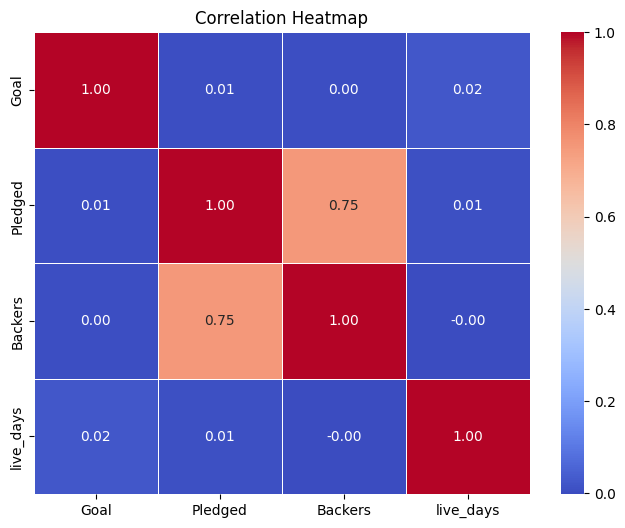

In [62]:
# We see the correlation between different features
corr_matrix = df[['Goal', 'Pledged', 'Backers', 'live_days']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

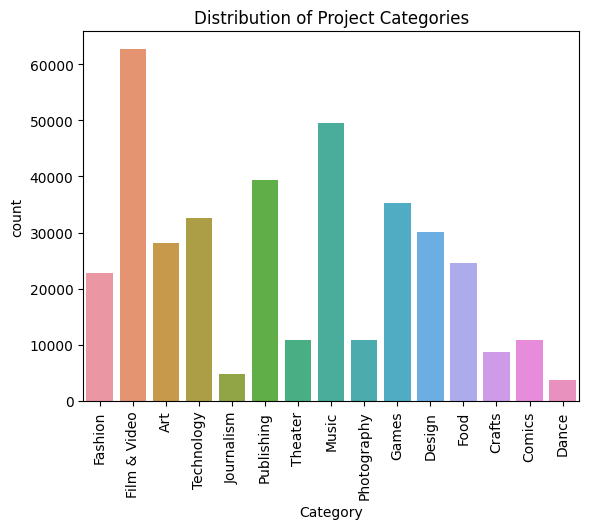

In [63]:
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Project Categories')
plt.show()

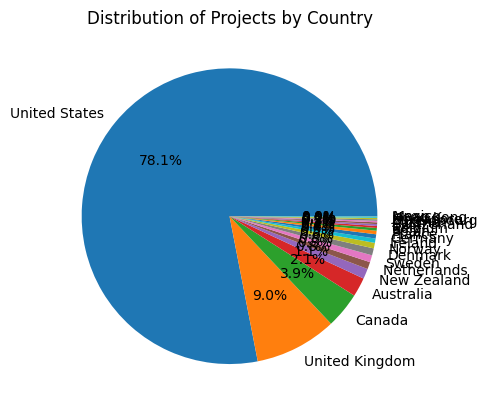

In [64]:
plt.pie(df['Country'].value_counts(), labels=df['Country'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Projects by Country')
plt.show()

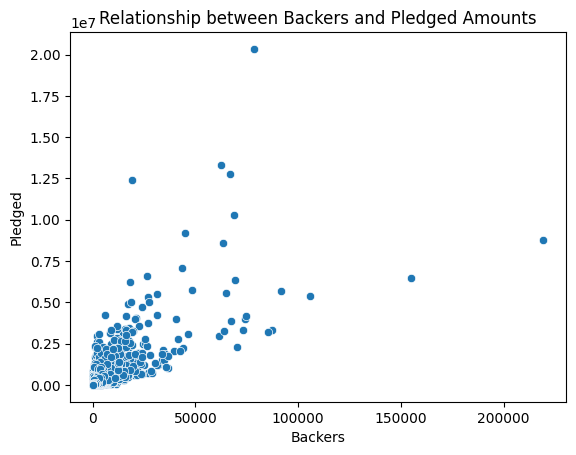

In [65]:
sns.scatterplot(x='Backers', y='Pledged', data=df)
plt.title('Relationship between Backers and Pledged Amounts')
plt.show()

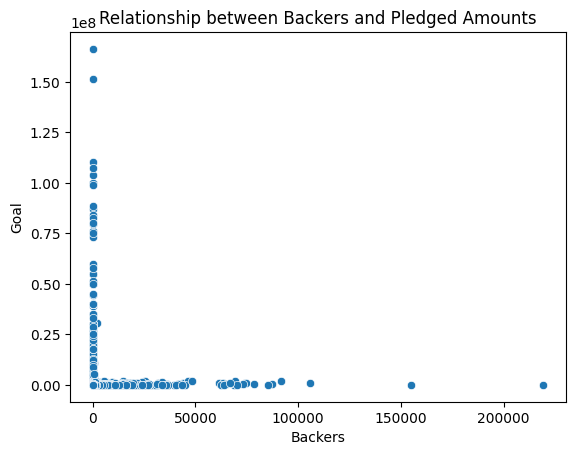

In [66]:
sns.scatterplot(x='Backers', y='Goal', data=df)
plt.title('Relationship between Backers and Pledged Amounts')
plt.show()

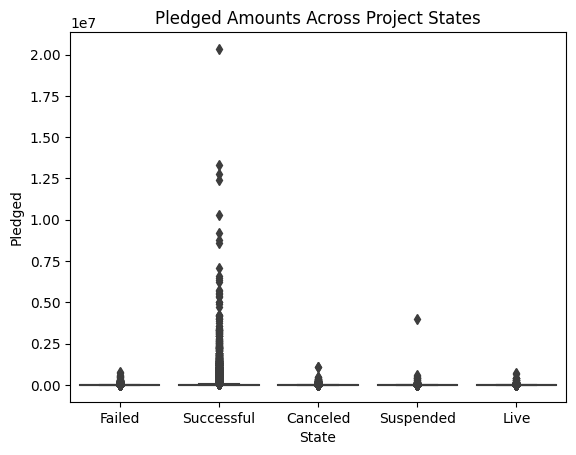

In [67]:
sns.boxplot(x='State', y='Pledged', data=df)
plt.title('Pledged Amounts Across Project States')
plt.show()

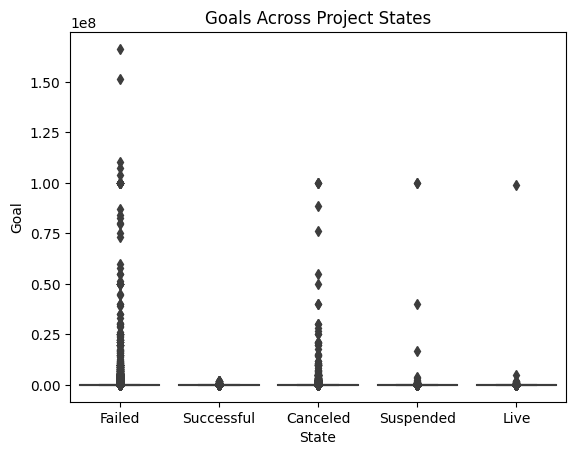

In [68]:
sns.boxplot(x='State', y='Goal', data=df)
plt.title('Goals Across Project States')
plt.show()

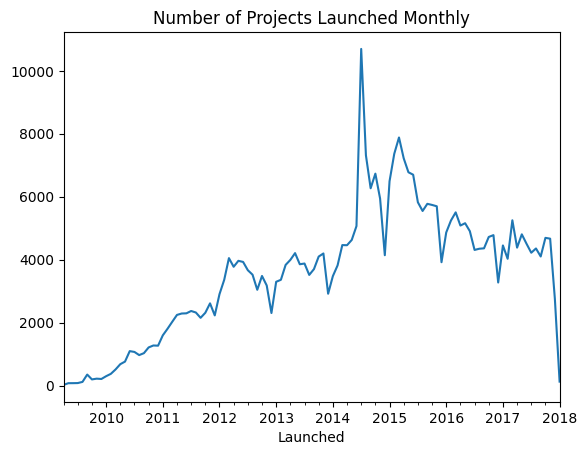

In [69]:
time_series_data = df.set_index('Launched')
time_series_data.resample('M').size().plot()
plt.title('Number of Projects Launched Monthly')
plt.show()

In [70]:
#removing the "Live" and "suspended" rows to keep the data clean

In [71]:
df = df[df['State'] != 'Live']

In [72]:
df = df[df['State'] != 'Suspended']

In [73]:
df.State.unique()

array(['Failed', 'Successful', 'Canceled'], dtype=object)

In [74]:
#converting into binary
df['State'] = df['State'].map({'Successful': 1, 'Failed': 0, 'Canceled': 0,})

In [75]:
df.head(10)

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,live_days
0,1860890148,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,39
1,709707365,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,87
2,1703704063,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,1,8
3,727286,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,1,79
4,1622952265,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,28
5,2089078683,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,1,17
6,830477146,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,0,29
7,266044220,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,1,29
8,1502297238,Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,0,32
9,813230527,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,0,16


### BaseLine Model

In [76]:
#defining X and y
X = df.drop('State', axis=1)
y = df.State

In [77]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [78]:
X_test.shape, X_train.shape

((111064, 10), (259149, 10))

In [79]:
y_train.shape

(259149,)

In [80]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class BaselineClassifier(BaseEstimator, ClassifierMixin):
    """
    Baseline model predicting everyone with a glucose value higher than 
    a threshold suffers from diabetes
    """
    def __init__(self, threshold=None):
        self.threshold = threshold
        
    def fit(self, X, y):
        # Compute the threshold as the mean of the 'Goal' column
        if self.threshold is None:
            self.threshold = np.mean(X['Goal'])
        return self
    
    def predict(self, X):
        # Assuming 'Goal' is the column you want to use for predictions
        predictions = [1 if goal_value > self.threshold else 0 for goal_value in X['Goal']]
        return np.array(predictions)

# Create an instance of the BaselineClassifier without specifying the threshold
baseline_model = BaselineClassifier()

# Fit the baseline model (computes the threshold during fitting)
baseline_model.fit(X_train, y_train)

# Make predictions using the baseline model
baseline_predictions = baseline_model.predict(X_test)

In [81]:
print(classification_report(y_test, baseline_predictions))
print(confusion_matrix(y_test, baseline_predictions))


              precision    recall  f1-score   support

           0       0.61      0.85      0.71     70909
           1       0.13      0.04      0.06     40155

    accuracy                           0.56    111064
   macro avg       0.37      0.45      0.38    111064
weighted avg       0.44      0.56      0.48    111064

[[60554 10355]
 [38653  1502]]


### Pre-Processing Data

In [82]:
# Defining num and cat features
#'live_days'
cat_features = ['Category','Country']
num_features = ['Goal','live_days']
                

In [83]:
#creating transformer using pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())                  
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     
])

In [84]:
# Columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])
# Pipeline with preprocessing and logistic regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced'))])


## Classifier Models

### Log-Reg Model

In [86]:
# Fitting the pipeline on training set
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Goal', 'live_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category', 'Country'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [87]:
y_pred = logreg_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67     70909
           1       0.48      0.66      0.56     40155

    accuracy                           0.62    111064
   macro avg       0.62      0.63      0.61    111064
weighted avg       0.66      0.62      0.63    111064

[[42451 28458]
 [13642 26513]]


### Random Forest

In [91]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(BalancedRandomForestClassifier())),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced'))])


In [92]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Goal', 'live_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category', 'Country'])])),
                ('feature_selection',
                 SelectFromModel(estimator=BalancedRandomForestClassifier())),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

In [93]:
y_pred_rf = rf_pipeline.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.59      0.66     70909
           1       0.46      0.62      0.53     40155

    accuracy                           0.60    111064
   macro avg       0.60      0.61      0.59    111064
weighted avg       0.64      0.60      0.61    111064

[[42102 28807]
 [15303 24852]]


Text(50.722222222222214, 0.5, 'Actual')

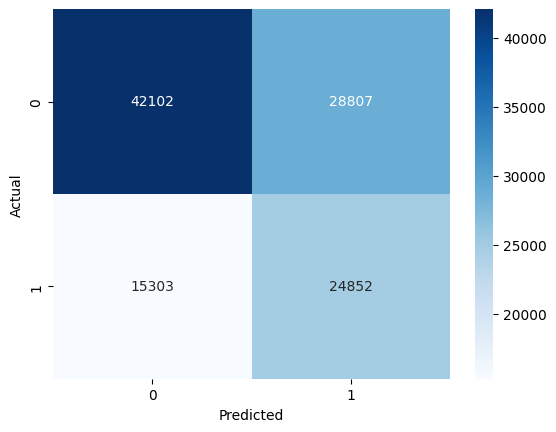

In [95]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### KNN Classifier 

In [96]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))])


In [97]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Goal', 'live_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category', 'Country'])])),
                ('classifier', KNeighborsClassifier())])

In [98]:
y_pred_knn = knn_pipeline.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73     70909
           1       0.51      0.42      0.46     40155

    accuracy                           0.64    111064
   macro avg       0.60      0.60      0.60    111064
weighted avg       0.63      0.64      0.63    111064

[[54467 16442]
 [23191 16964]]


Text(50.722222222222214, 0.5, 'Actual')

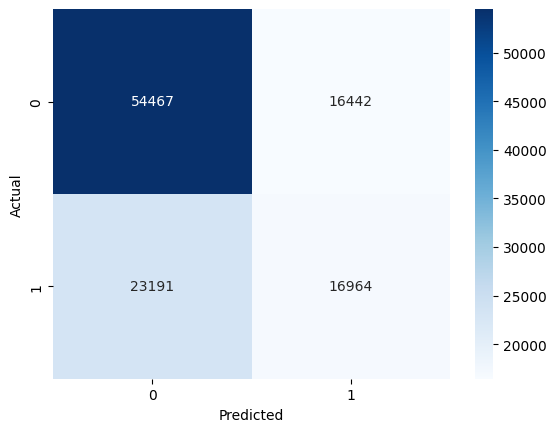

In [100]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### XG Boost

In [101]:

#('scaler', StandardScaler())
xg_pipeline = Pipeline(steps=
            [('preprocessor', preprocessor),
             ('classifier',XGBClassifier())])
xg_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}
xg_grid = GridSearchCV(xg_pipeline, param_grid=xg_param_grid, cv=5, scoring='recall')

In [102]:
xg_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Goal',
                                                                          'live_days']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Category',
                                                                          'Country'])])),
                                       (...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='recall')

### Best XG Model

In [103]:
# Get the best parameters from the grid search
best_params = xg_grid.best_params_

# Get the best estimator (model) from the grid search
best_xgb_model = xg_grid.best_estimator_


In [104]:
best_params

{'classifier__learning_rate': 0.2,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 200}

In [105]:
best_xgb_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Goal', 'live_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category', 'Country'])])),
                ('classifier',
                 XGBClassifier(b...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [106]:
y_pred_xg = best_xgb_model.predict(X_test)

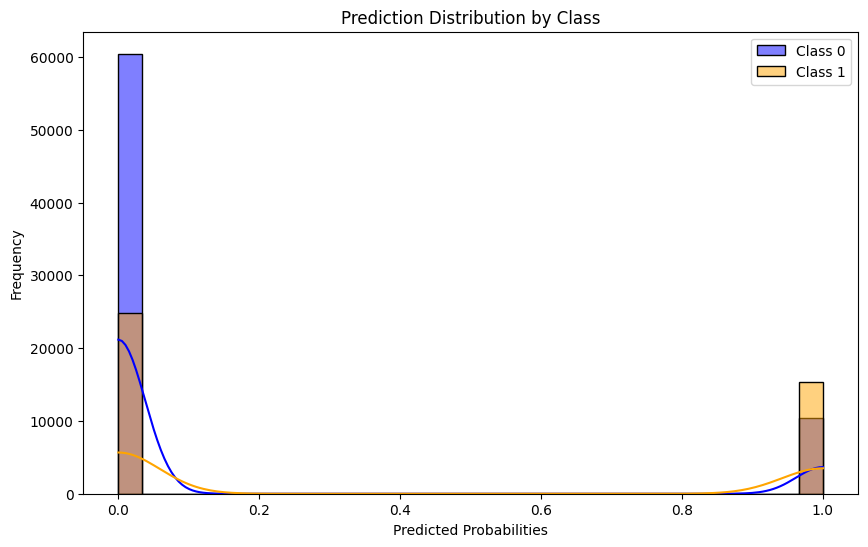

In [107]:
#Visualizing the Results 

y_probabilities_class_0 = y_pred_xg[y_test == 0]
y_probabilities_class_1 = y_pred_xg[y_test == 1]

# Visualize the prediction distribution using a histogram
plt.figure(figsize=(10, 6))

# Plot predicted probabilities for class 0
sns.histplot(y_probabilities_class_0, bins=30, kde=True, label='Class 0', color='blue')

# Plot predicted probabilities for class 1
sns.histplot(y_probabilities_class_1, bins=30, kde=True, label='Class 1', color='orange')

plt.title('Prediction Distribution by Class')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [109]:
print(classification_report(y_test, y_pred_xg))
print(confusion_matrix(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77     70909
           1       0.59      0.38      0.46     40155

    accuracy                           0.68    111064
   macro avg       0.65      0.62      0.62    111064
weighted avg       0.67      0.68      0.66    111064

[[60455 10454]
 [24828 15327]]


Text(50.722222222222214, 0.5, 'Actual')

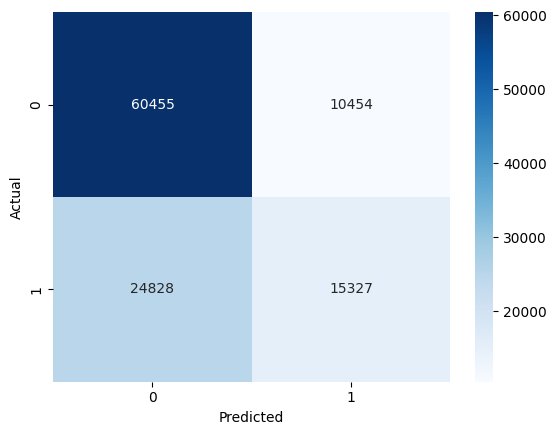

In [108]:
cm_xg = confusion_matrix(y_test, y_pred_xg)
sns.heatmap(cm_xg, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Balanced RandomForest

In [110]:
brf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(BalancedRandomForestClassifier())),
    ('classifier', BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1,
                                                  class_weight='balanced'))
])

brf_pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.0s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Goal', 'live_days']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category', 'Country'])])),
                ('feature_selection',
                 SelectFromModel(estimator=BalancedRandomForestClassifier())),
                ('classifier',
                 BalancedRandomForestClassifier(class_weight='balanced',
                                                n_jobs=-1, random_state=42,
                                                verbose=1))])

In [112]:
# Predicting on Balanced RandomForest
y_pred_brf = brf_pipeline.predict(X_test)

# Evaluation on Balanced RandomForest
print(classification_report(y_test, y_pred_brf))
#cm_brf = confusion_matrix(y_test, y_pred_brf)
#sns.heatmap(cm_brf, annot = True, fmt = 'g', cmap = 'Blues')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.79      0.35      0.48     70909
           1       0.42      0.84      0.56     40155

    accuracy                           0.52    111064
   macro avg       0.60      0.59      0.52    111064
weighted avg       0.65      0.52      0.51    111064



[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


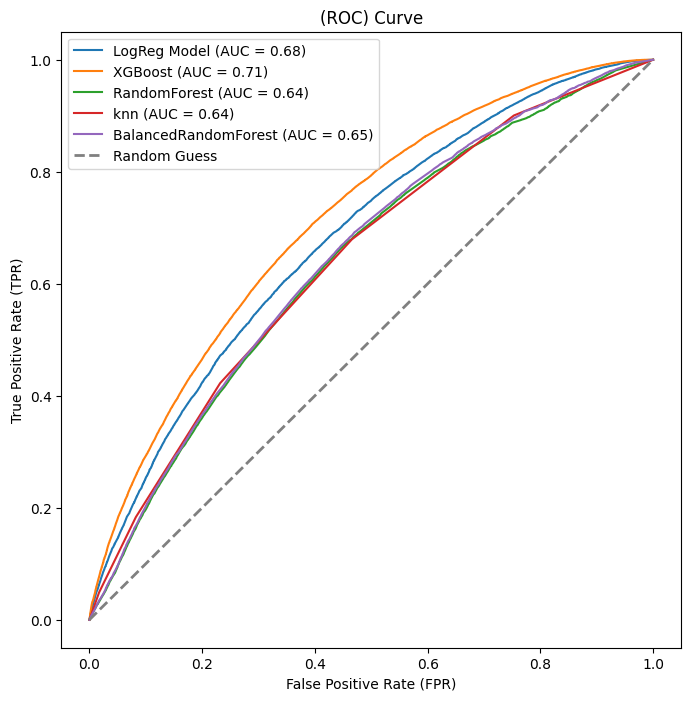

In [116]:
# Predict probabilities for the test set on different models
y_prob_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]
y_prob_knn = knn_pipeline.predict_proba(X_test)[:, 1]
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
y_prob_xg = xg_grid.predict_proba(X_test)[:, 1]
y_prob_bal_rf = brf_pipeline.predict_proba(X_test)[:, 1]


# ROC & auc for logReg
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, y_prob_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

# ROC & auc for RandomForest
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# ROC & auc for XGBoost
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_prob_xg)
auc_xg = roc_auc_score(y_test, y_prob_xg)

# ROC & auc for knn
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

# ROC & auc for Balanced RandomForest
fpr_bal_rf, tpr_bal_rf, thresholds = roc_curve(y_test, y_prob_bal_rf)
auc_bal_rf = roc_auc_score(y_test, y_prob_bal_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg Model (AUC = {auc_logreg:.2f})')
plt.plot(fpr_xg, tpr_xg, label=f'XGBoost (AUC = {auc_xg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'knn (AUC = {auc_knn:.2f})')
plt.plot(fpr_bal_rf, tpr_bal_rf, label=f'BalancedRandomForest (AUC = {auc_bal_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.title('(ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()




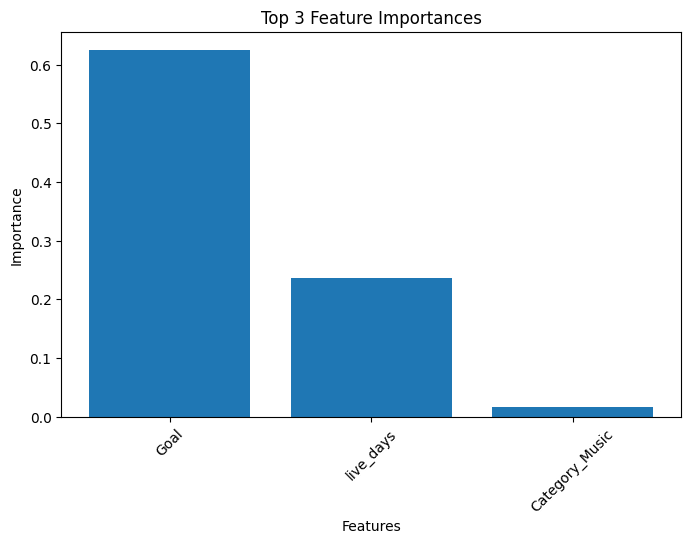

In [67]:
try:
    # Ensure that the model is fitted before extracting feature importances
    importances = xg_pipeline.named_steps['classifier'].feature_importances_
    
    # Get feature names after one-hot encoding
    onehot_columns = list(xg_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_features))
    feature_names = num_features + onehot_columns
    
    # Get indices of the top 3 features
    top3_indices = np.argsort(importances)[::-1][:3]

    # Plot the top 3 feature importances
    plt.figure(figsize=(8, 5))
    plt.bar(range(3), importances[top3_indices], align="center")
    plt.xticks(range(3), np.array(feature_names)[top3_indices], rotation=45)
    plt.title("Top 3 Feature Importances")
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

except AttributeError as e:
    print(f"Error: {e}")
    print("The classifier in the pipeline may not have 'feature_importances_' attribute.")

In [69]:
# Replace 'model1', 'model2', 'model3' with your actual models
model1 = pipeline
model2 = rf_pipeline
model3 = xg_pipeline

# Creating the StackingClassifier with the three pipelines and a final estimator
estimators = [('model1', model1), ('model2', model2), ('model3', model3)]
final_estimator = LogisticRegression()  # You can use any other classifier as well

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Training the StackingClassifier
stacking_clf.fit(X_train, y_train)

# Making predictions
stacking_predictions = stacking_clf.predict(X_test)

# Evaluating the performance
accuracy = accuracy_score(y_test, stacking_predictions)
print(f"Stacking Classifier Accuracy: {accuracy}")

Stacking Classifier Accuracy: 0.6829755816466182


In [71]:
precision = precision_score(y_test, stacking_predictions)
recall = recall_score(y_test, stacking_predictions)
conf_matrix = confusion_matrix(y_test, stacking_predictions)

In [72]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")

Precision: 0.5950851824789447
Recall: 0.38535674262233843
Confusion Matrix:
[[60380 10529]
 [24681 15474]]
